In [1]:
%matplotlib inline

import ast
import json
import urllib
import urllib2
from cStringIO import StringIO
import pandas as pd
import geopandas as gpd
import os
import pylab as pl
import numpy as np
%pylab inline



SQL_SOURCE = 'https://htv210.cartodb.com/api/v2/sql'

def queryCartoDB(query, format='CSV', source=SQL_SOURCE):
    data = urllib.urlencode({'format': format, 'q': query})
    try:
        response = urllib2.urlopen(source, data)
    except urllib2.HTTPError, e:
        raise ValueError('\n'.join(ast.literal_eval(e.readline())['error']))
    except Exception:
        raise
    return StringIO(response.read())

Populating the interactive namespace from numpy and matplotlib


In [2]:
dischargeQuery = '''
SELECT *
FROM nyc_discharge_2013
LIMIT 3
'''
dischargeStream = queryCartoDB(dischargeQuery, format='CSV')
discharge       = pd.read_csv(dischargeStream)
discharge.head()

,cartodb_id,the_geom,the_geom_webmercator,hospital_county,operating_certificate_number,facility_id,age_group,zip_code___3_digits,gender,race,ethnicity,length_of_stay,admit_day_of_week,type_of_admission,patient_disposition,discharge_year,discharge_day_of_week,ccs_diagnosis_code,ccs_diagnosis_description
0,153,NaN,NaN,Bronx,7000001,1164,30 to 49,104,M,Other Race,Unknown,16,THU,Elective,Home or Self Care,2013,SAT,661,SUBSTANCE-RLTD DISORDER
1,751,NaN,NaN,Bronx,7000001,1164,0 to 17,104,F,Other Race,Unknown,14,FRI,Emergency,Home or Self Care,2013,FRI,659,SCHIZ/OTH PSYCH DISORDR
2,797,NaN,NaN,Bronx,7000001,1164,18 to 29,104,F,Other Race,Unknown,5,TUE,Elective,Home or Self Care,2013,SUN,660,ALCOHOL-RELATD DISORDER


In [3]:
facilityQuery = '''
SELECT *
FROM nyc_facilities
LIMIT 3

'''
facilityStream = queryCartoDB(facilityQuery, format='GeoJSON')
facilityData   = json.loads(facilityStream.read())
facilities     = gpd.GeoDataFrame.from_features(facilityData['features'])
facilities.head()

,cartodb_id,cooperator_address,cooperator_address_2,cooperator_city,cooperator_name,cooperator_state,cooperator_zip_code,description,facility_address_1,facility_address_2,...,operator_address_1,operator_address_2,operator_city,operator_name,operator_state,operator_zip_code,ownership_type,regional_office,regional_office_id,short_description
0,2106,,,,,New York,None,Diagnostic and Treatment Center,1110 Pennsylvania Avenue,,...,1110 Pennsylvania Avenue,,Brooklyn,PALA Community Care LLC,New York,11207,LLC,Metropolitan Area Regional Office - New York City,5,DTC
1,2311,,,,,New York,None,Diagnostic and Treatment Center,468 Lafayette Avenue,,...,468 Lafayette Avenue,,Brooklyn,"Medcare, LLC",New York,11205,LLC,Metropolitan Area Regional Office - New York City,5,DTC
2,643,,,,,New York,None,Diagnostic and Treatment Center,1776 Clay Avenue,,...,1776 Clay Avenue,,Bronx,P R O M E S A Inc,New York,10457,Not for Profit Corporation,Metropolitan Area Regional Office - New York City,5,DTC


In [14]:
zipcodeQuery = '''
SELECT *
FROM nyc_zipcode_highway

'''
zipcodeStream = queryCartoDB(zipcodeQuery, format='GeoJSON')
zipcodeData   = json.loads(zipcodeStream.read())
zipcodes      = gpd.GeoDataFrame.from_features(zipcodeData['features'])
zipcodes.head()

,cartodb_id,geometry,highway_length,zipcode
0,1,"(POLYGON ((-74.194287 40.608911, -74.194929 40...",23.486470,10314
1,2,"(POLYGON ((-73.980886 40.75927, -73.9804259999...",0.000000,10112
2,3,"(POLYGON ((-74.011674 40.709687, -74.012646 40...",1.447405,10048
3,4,"(POLYGON ((-73.97282 40.75587, -73.973276 40.7...",0.000000,10171
4,5,"(POLYGON ((-73.973735 40.754619, -73.975352 40...",0.000000,10172


Testing done...

Task 1:

In [6]:
#query top 5 facilitis with the highest asthma treatment and their asthma treatment counts
dischargeQuery = '''
SELECT 
facility_id,
Count(ccs_diagnosis_description) AS asthma_count
FROM nyc_discharge_2013
WHERE ccs_diagnosis_description LIKE '%ASTHMA%'
GROUP BY
facility_id
ORDER BY
asthma_count desc
LIMIT 5
'''
dischargeStream = queryCartoDB(dischargeQuery, format='CSV')
discharge       = pd.read_csv(dischargeStream)
discharge.head()

,facility_id,asthma_count
0,1172,1878
1,1169,1786
2,1301,1057
3,1165,920
4,1178,890


now i have the facility id, i can find the facility name by querying facilities

In [7]:
#quering facilities to find out top 5 facilities name
facilityQuery = '''
SELECT *
FROM nyc_facilities
WHERE facility_id = 1172
OR facility_id = 1169
OR facility_id = 1301
OR facility_id = 1165
OR facility_id = 1178

'''
facilityStream = queryCartoDB(facilityQuery, format='GeoJSON')
facilityData   = json.loads(facilityStream.read())
facilities     = gpd.GeoDataFrame.from_features(facilityData['features'])
facilities.head()

,cartodb_id,cooperator_address,cooperator_address_2,cooperator_city,cooperator_name,cooperator_state,cooperator_zip_code,description,facility_address_1,facility_address_2,...,operator_address_1,operator_address_2,operator_city,operator_name,operator_state,operator_zip_code,ownership_type,regional_office,regional_office_id,short_description
0,624,,,,,New York,NaN,Hospital,1400 Pelham Parkway,,...,125 Worth Street,,New York,New York City Health and Hospital Corporation,New York,10013,Municipality,Metropolitan Area Regional Office - New York City,5,HOSP
1,627,111 East 210th Street,,Bronx,Montefiore Medical Center,New York,10467,Hospital,111 East 210th Street,,...,111 East 210th Street,,Bronx,"Montefiore Health System, Inc",New York,10467,Not for Profit Corporation,Metropolitan Area Regional Office - New York City,5,HOSP
2,628,,,,,New York,NaN,Hospital,234 East 149th Street,,...,125 Worth Street,,New York,New York City Health and Hospital Corporation,New York,10013,Municipality,Metropolitan Area Regional Office - New York City,5,HOSP
3,631,,,,,New York,NaN,Hospital,1650 Grand Concourse,,...,1276 Fulton Avenue,,Bronx,Bronx Lebanon Hospital Center Inc,New York,10456,Not for Profit Corporation,Metropolitan Area Regional Office - New York City,5,HOSP
4,696,,,,,New York,NaN,Hospital,451 Clarkson Avenue,,...,125 Worth Street,,New York,New York City Health and Hospital Corporation,New York,10013,Municipality,Metropolitan Area Regional Office - New York City,5,HOSP


In [8]:
#besides facilities name, i need their zipcodes
print facilities.facility_name, facilities.facility_zip_code

0                                Jacobi Medical Center
1    Montefiore Medical Center - Henry & Lucy Moses...
2               Lincoln Medical & Mental Health Center
3    Bronx-Lebanon Hospital Center - Concourse Divi...
4                         Kings County Hospital Center
Name: facility_name, dtype: object 0    10461
1    10467
2    10451
3    10457
4    11203
Name: facility_zip_code, dtype: int64


The above 5 facilities are the top 5 with the highest number asthma treatment in NYC.

Plot 5 facilities on the map

In [9]:
%matplotlib inline
import seaborn as sns
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import pysal as ps
import mplleaflet

In [87]:
def getXY(pt):
    return pt.x, pt.y

x,y = [list(p) for p in zip(*map(getXY, facilities.geometry))]

In [89]:
# dots = facilities.set_geometry(facilities.geometry.buffer(1000))
f, ax = plt.subplots(1, figsize = (10,10))
# facilities.plot(k = 5, alpha = 1, axes = ax)
ax.plot(x,y, 'rs')
mplleaflet.display(crs=facilities.crs)

Task 2: plot highway_length per all zipcodes in NYC

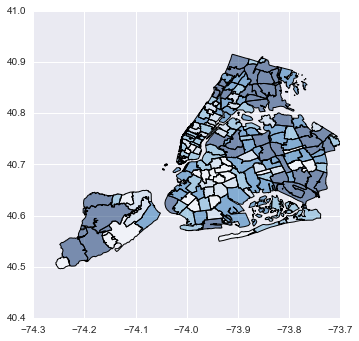

In [15]:
zipcodes.plot(column = 'highway_length', scheme = 'QUANTILES', k=5, colormap ='Blues')

In [18]:
zipcodeQuery = '''
SELECT *
FROM nyc_zipcode_highway
WHERE zipcode = 10461
OR zipcode = 10467
OR zipcode = 10451
OR zipcode = 10457
OR zipcode = 11203
'''
zipcodeStream = queryCartoDB(zipcodeQuery, format='GeoJSON')
zipcodeData   = json.loads(zipcodeStream.read())
zipcodes      = gpd.GeoDataFrame.from_features(zipcodeData['features'])
zipcodes.head()

,cartodb_id,geometry,highway_length,zipcode
0,106,"(POLYGON ((-73.863293 40.89529, -73.862875 40....",19.172015,10467
1,111,"(POLYGON ((-73.931681 40.807955, -73.931704 40...",7.914185,10451
2,123,"(POLYGON ((-73.897516 40.856183, -73.896533000...",5.017199,10457
3,125,"(POLYGON ((-73.82612399999999 40.834214, -73.8...",18.102258,10461
4,195,"(POLYGON ((-73.942503 40.638965, -73.943986 40...",2.212840,11203


In [16]:
#create a dataframe containing zipcode,highway_length,asthma_count and facility_id
df = pd.concat([discharge,facilities],axis = 1)

In [19]:
dataframe = pd.concat([df,zipcodes],axis = 1)
print dataframe.columns

Index([                 u'facility_id',                 u'asthma_count',
                         u'cartodb_id',           u'cooperator_address',
               u'cooperator_address_2',              u'cooperator_city',
                    u'cooperator_name',             u'cooperator_state',
                u'cooperator_zip_code',                  u'description',
                 u'facility_address_1',           u'facility_address_2',
                      u'facility_city',              u'facility_county',
               u'facility_county_code',          u'facility_fax_number',
                        u'facility_id',            u'facility_latitude',
                  u'facility_location',           u'facility_longitude',
                      u'facility_name',           u'facility_open_date',
              u'facility_phone_number',               u'facility_state',
                   u'facility_website',            u'facility_zip_code',
                           u'geometry',        u'ma

In [20]:
print dataframe

   facility_id  asthma_count  cartodb_id     cooperator_address  \
0         1172          1878         624                          
1         1169          1786         627  111 East 210th Street   
2         1301          1057         628                          
3         1165           920         631                          
4         1178           890         696                          

  cooperator_address_2 cooperator_city            cooperator_name  \
0                                                                   
1                                Bronx  Montefiore Medical Center   
2                                                                   
3                                                                   
4                                                                   

  cooperator_state  cooperator_zip_code description   ...    operator_state  \
0         New York                  NaN    Hospital   ...          New York   
1         New York      

Task 2 done...... though a little messing

Task 5: i am working on 311 data
I am using a stupid way...
I choose 2013 data since discharge data is 2013

In [27]:
#read in 311 data with columns: complaint type, incident zip
calls = pd.read_csv('2013_311_Service_Requests-2.csv')

/Users/XS/anaconda/lib/python2.7/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [28]:
print calls.columns

Index([u'Complaint Type', u'Incident Zip', u'Latitude', u'Longitude',
       u'Location'],
      dtype='object')


In [29]:
print calls['Complaint Type']

0                   Adopt-A-Basket
1                   Adopt-A-Basket
2                   Adopt-A-Basket
3                   Adopt-A-Basket
4                   Adopt-A-Basket
5                   Adopt-A-Basket
6                   Adopt-A-Basket
7                   Adopt-A-Basket
8                   Adopt-A-Basket
9                   Adopt-A-Basket
10                  Adopt-A-Basket
11                  Adopt-A-Basket
12                  Adopt-A-Basket
13                  Adopt-A-Basket
14                  Adopt-A-Basket
15                  Adopt-A-Basket
16                  Adopt-A-Basket
17                  Adopt-A-Basket
18                  Adopt-A-Basket
19                  Adopt-A-Basket
20                  Adopt-A-Basket
21                  Adopt-A-Basket
22                  Adopt-A-Basket
23                  Adopt-A-Basket
24                  Adopt-A-Basket
25                  Adopt-A-Basket
26                  Adopt-A-Basket
27                  Adopt-A-Basket
28                  

In [30]:
#count all complaint per zipcode
com_count = (calls['Complaint Type'].groupby(calls['Incident Zip']).count())
print com_count

Incident Zip
0.0              4
46.0             1
83.0            84
1122.0           1
10000.0         63
10001.0       4014
10002.0       8370
10003.0       8229
10004.0        797
10005.0       1158
10006.0        469
10007.0       1410
10009.0       7571
10010.0       3148
10011.0       6859
10012.0       4823
10013.0       5654
10014.0       5493
10016.0       6254
10017.0       2578
10018.0       2287
10019.0       7297
10020.0        167
10021.0       3577
10022.0       4557
10023.0       6104
10024.0       5540
10025.0       9095
10026.0       5491
10027.0       9753
              ... 
90010            1
90060-0578       1
900836           1
91325            2
91761            1
92008            1
92025            1
92038            1
92123           10
92210            1
92507            1
92618            1
9262             1
92626            1
92780            1
92816            1
94105            1
94551            1
94566            3
94566-9054       3
95476            5

In [31]:
# read in 311 data after filtering online, complaint type subsets to UNSANITARY CONDITION','Dirty Conditions', 'Sewer',
                   #'Hazardous Material','Construction',
                   #'Indoor Air Quality','Indoor Sewage','Air Quality',
                   #'HEATING','Industrial Waste','Mold','Asbestos',
                   #'Sweeping/Missed-Inadequate','Smoking',
                   #'Non-Residential Heat','Lead','Standing Water',
                    #'Water Quality','Unsanitary Animal Facility','PAINT - PLASTER','GENERAL CONSTRUCTION'
                    #which are recommanded by instructor
calls_type = pd.read_csv('2013_311_Service_Requests-3.csv')

In [32]:
print calls_type['Complaint Type']

0         Water Quality
1         Water Quality
2         Water Quality
3         Water Quality
4         Water Quality
5         Water Quality
6         Water Quality
7         Water Quality
8         Water Quality
9         Water Quality
10        Water Quality
11        Water Quality
12        Water Quality
13        Water Quality
14        Water Quality
15        Water Quality
16        Water Quality
17        Water Quality
18        Water Quality
19        Water Quality
20        Water Quality
21        Water Quality
22        Water Quality
23        Water Quality
24        Water Quality
25        Water Quality
26        Water Quality
27        Water Quality
28        Water Quality
29        Water Quality
              ...      
378320      Air Quality
378321      Air Quality
378322      Air Quality
378323      Air Quality
378324      Air Quality
378325      Air Quality
378326      Air Quality
378327      Air Quality
378328      Air Quality
378329      Air Quality
378330      Air 

In [33]:
#count selected complaint per zipcode
type_count = (calls_type['Complaint Type'].groupby(calls_type['Incident Zip']).count())
print type_count

Incident Zip
0          15
10000       2
10001     814
10002    1994
10003    1957
10004     104
10005      79
10006      53
10007     161
10009    2597
10010     788
10011    1847
10012    1126
10013     893
10014    1370
10016    1553
10017     361
10018     452
10019    1582
10020       9
10021     885
10022     858
10023    1095
10024    1696
10025    3824
10026    2005
10027    3786
10028    1239
10029    3206
10030    2952
         ... 
11385    3257
11411     569
11412    1631
11413    1170
11414     924
11415     748
11416     821
11417     915
11418    1049
11419    1252
11420    1092
11421    1052
11422     749
11423    1020
11426     373
11427     777
11428     589
11429     900
11430      19
11432    2272
11433    1730
11434    1910
11435    1816
11436     784
11691    2660
11692     848
11693     541
11694    1434
11695       1
11697      27
Name: Complaint Type, dtype: int64


In [47]:
#calculate the ratio for each zipcode, normalization
ratio = type_count/com_count*100
print ratio

Incident Zip
0.0           375.000000
46.0                 NaN
83.0                 NaN
1122.0               NaN
10000.0         3.174603
10001.0        20.279023
10002.0        23.823178
10003.0        23.781747
10004.0        13.048934
10005.0         6.822107
10006.0        11.300640
10007.0        11.418440
10009.0        34.301942
10010.0        25.031766
10011.0        26.928124
10012.0        23.346465
10013.0        15.794128
10014.0        24.940834
10016.0        24.832107
10017.0        14.003103
10018.0        19.763883
10019.0        21.680143
10020.0         5.389222
10021.0        24.741403
10022.0        18.828176
10023.0        17.939056
10024.0        30.613718
10025.0        42.045080
10026.0        36.514296
10027.0        38.818825
                 ...    
90010                NaN
90060-0578           NaN
900836               NaN
91325                NaN
91761                NaN
92008                NaN
92025                NaN
92038                NaN
92123       

In [80]:
#creating a dataframe containing ratio
df_ratio = pd.concat([calls,ratio], axis=1,join='inner')
df_ratio.columns = ['Complaint Type','zip','Lat','Long','Location','ratio']
print df_ratio

          Complaint Type    zip        Lat       Long  \
0         Adopt-A-Basket  10454  40.808505 -73.921468   
46        Adopt-A-Basket  11203  40.661267 -73.932332   
83         Agency Issues    NaN        NaN        NaN   
1122       Agency Issues    NaN        NaN        NaN   
10000       Animal Abuse  10473  40.816568 -73.850626   
10001       Animal Abuse  10459  40.819004 -73.894781   
10002       Animal Abuse  10457  40.845765 -73.910292   
10003       Animal Abuse  10469  40.864440 -73.841715   
10004       Animal Abuse  10474  40.818312 -73.885577   
10005       Animal Abuse  10452  40.840329 -73.912923   
10006       Animal Abuse  10452  40.830928 -73.922919   
10007       Animal Abuse  10471  40.895778 -73.896903   
10009       Animal Abuse  10453  40.853474 -73.906450   
10010       Animal Abuse  10475  40.882067 -73.832210   
10011       Animal Abuse  10455  40.812960 -73.913761   
10012       Animal Abuse  10474  40.815204 -73.887609   
10013       Animal Abuse  10457

In [98]:
#removing nans and zeros
b = df_ratio[(df_ratio.ratio.notnull())& (df_ratio.index!=0)]
print b

         Complaint Type    zip        Lat       Long  \
10000      Animal Abuse  10473  40.816568 -73.850626   
10001      Animal Abuse  10459  40.819004 -73.894781   
10002      Animal Abuse  10457  40.845765 -73.910292   
10003      Animal Abuse  10469  40.864440 -73.841715   
10004      Animal Abuse  10474  40.818312 -73.885577   
10005      Animal Abuse  10452  40.840329 -73.912923   
10006      Animal Abuse  10452  40.830928 -73.922919   
10007      Animal Abuse  10471  40.895778 -73.896903   
10009      Animal Abuse  10453  40.853474 -73.906450   
10010      Animal Abuse  10475  40.882067 -73.832210   
10011      Animal Abuse  10455  40.812960 -73.913761   
10012      Animal Abuse  10474  40.815204 -73.887609   
10013      Animal Abuse  10457  40.850199 -73.889693   
10014      Animal Abuse  10458  40.865872 -73.891074   
10016      Animal Abuse  10463  40.882699 -73.916100   
10017      Animal Abuse  10465  40.813894 -73.826764   
10018      Animal Abuse  10475  40.873826 -73.82

In [50]:
zipcodeQuery = '''
SELECT *
FROM nyc_zipcode_highway

'''
zipcodeStream = queryCartoDB(zipcodeQuery, format='GeoJSON')
zipcodeData   = json.loads(zipcodeStream.read())
zipcodes      = gpd.GeoDataFrame.from_features(zipcodeData['features'])
zipcodes.head()

,cartodb_id,geometry,highway_length,zipcode
0,1,"(POLYGON ((-74.194287 40.608911, -74.194929 40...",23.486470,10314
1,2,"(POLYGON ((-73.980886 40.75927, -73.9804259999...",0.000000,10112
2,3,"(POLYGON ((-74.011674 40.709687, -74.012646 40...",1.447405,10048
3,4,"(POLYGON ((-73.97282 40.75587, -73.973276 40.7...",0.000000,10171
4,5,"(POLYGON ((-73.973735 40.754619, -73.975352 40...",0.000000,10172


In [106]:
zipcodes.index = zipcodes.zipcode
print zipcodes

         cartodb_id                                           geometry  \
zipcode                                                                  
10314             1  (POLYGON ((-74.194287 40.608911, -74.194929 40...   
10112             2  (POLYGON ((-73.980886 40.75927, -73.9804259999...   
10048             3  (POLYGON ((-74.011674 40.709687, -74.012646 40...   
10171             4  (POLYGON ((-73.97282 40.75587, -73.973276 40.7...   
10172             5  (POLYGON ((-73.973735 40.754619, -73.975352 40...   
10167             6  (POLYGON ((-73.97418999999999 40.753994, -73.9...   
10103             7  (POLYGON ((-73.975831 40.760418, -73.976288999...   
11365             8  (POLYGON ((-73.814769 40.734764, -73.814742 40...   
11208             9  (POLYGON ((-73.880723 40.690243, -73.879456 40...   
11004            10  (POLYGON ((-73.70763100000001 40.74994, -73.70...   
11361            11  (POLYGON ((-73.768316 40.755466, -73.769049 40...   
11430            12  (POLYGON ((-73.81

In [165]:
zipcodes_ratio = pd.concat([zipcodes,b],axis=1,join = 'inner')
print zipcodes_ratio

       cartodb_id                                           geometry  \
10001         150  (POLYGON ((-73.999352 40.74733, -74.000399 40....   
10002          98  (POLYGON ((-73.97702 40.711649, -73.977141 40....   
10003         142  (POLYGON ((-73.981562 40.732643, -73.982022 40...   
10004         200  (POLYGON ((-74.02213 40.684541, -74.022385 40....   
10005         115  (POLYGON ((-74.008269 40.707722, -74.008645 40...   
10006         120  (POLYGON ((-74.01101199999999 40.708594, -74.0...   
10007         119  (POLYGON ((-74.002709 40.712597, -74.003163 40...   
10009         128  (POLYGON ((-73.97616499999999 40.733385, -73.9...   
10010         144  (POLYGON ((-73.975391 40.73306, -73.9761649999...   
10011         149  (POLYGON ((-74.000399 40.747767, -73.999352 40...   
10012         143  (POLYGON ((-74.000657 40.722183, -74.001403 40...   
10013         141  (POLYGON ((-74.002351 40.714696, -74.002115 40...   
10014         148  (POLYGON ((-74.00220299999999 40.729654, -74.

plot 311 complaint ratio for all zipcodes in NYC

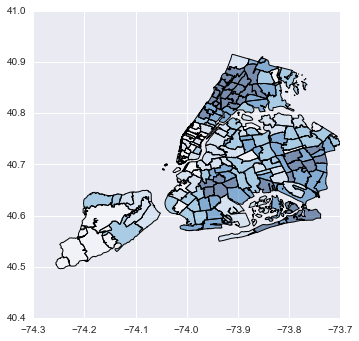

In [112]:
zipcodes_ratio.plot(column = 'ratio', scheme = 'QUANTILES', k=5, colormap ='Blues')

In [113]:
#adding ratio to the dataframe which i will use in regression
data = pd.merge(dataframe,zipcodes_ratio, on='zipcode',how='inner')
print data


   facility_id  asthma_count  cartodb_id_x     cooperator_address  \
0         1172          1878           624                          
1         1169          1786           627  111 East 210th Street   
2         1301          1057           628                          
3         1165           920           631                          
4         1178           890           696                          

  cooperator_address_2 cooperator_city            cooperator_name  \
0                                                                   
1                                Bronx  Montefiore Medical Center   
2                                                                   
3                                                                   
4                                                                   

  cooperator_state  cooperator_zip_code description    ...     zipcode  \
0         New York                  NaN    Hospital    ...       10467   
1         New York    

In [114]:
data.columns

Index([                 u'facility_id',                 u'asthma_count',
                       u'cartodb_id_x',           u'cooperator_address',
               u'cooperator_address_2',              u'cooperator_city',
                    u'cooperator_name',             u'cooperator_state',
                u'cooperator_zip_code',                  u'description',
                 u'facility_address_1',           u'facility_address_2',
                      u'facility_city',              u'facility_county',
               u'facility_county_code',          u'facility_fax_number',
                        u'facility_id',            u'facility_latitude',
                  u'facility_location',           u'facility_longitude',
                      u'facility_name',           u'facility_open_date',
              u'facility_phone_number',               u'facility_state',
                   u'facility_website',            u'facility_zip_code',
                         u'geometry_x',        u'ma

In [124]:
data

,facility_id,asthma_count,cartodb_id_x,cooperator_address,cooperator_address_2,cooperator_city,cooperator_name,cooperator_state,cooperator_zip_code,description,...,zipcode,cartodb_id_y,geometry_y,highway_length_y,Complaint Type,zip,Lat,Long,Location,ratio
0,1172,1878,624,,,,,New York,NaN,Hospital,...,10467,106,"(POLYGON ((-73.863293 40.89529, -73.862875 40....",19.172015,Animal Abuse,10457,40.850520,-73.886794,"(40.850519816693236, -73.88679390286971)",48.481399
1,1169,1786,627,111 East 210th Street,,Bronx,Montefiore Medical Center,New York,10467,Hospital,...,10451,111,"(POLYGON ((-73.931681 40.807955, -73.931704 40...",7.914185,Animal Abuse,10475,40.883142,-73.833284,"(40.88314153966802, -73.83328447490193)",46.325201
2,1301,1057,628,,,,,New York,NaN,Hospital,...,10457,123,"(POLYGON ((-73.897516 40.856183, -73.896533000...",5.017199,Animal Abuse,10460,40.842484,-73.881740,"(40.8424837305154, -73.88174049848104)",44.588913
3,1165,920,631,,,,,New York,NaN,Hospital,...,10461,125,"(POLYGON ((-73.82612399999999 40.834214, -73.8...",18.102258,Animal Abuse,10475,40.885731,-73.826663,"(40.88573100967571, -73.82666333986792)",37.336449
4,1178,890,696,,,,,New York,NaN,Hospital,...,11203,195,"(POLYGON ((-73.942503 40.638965, -73.943986 40...",2.212840,Animal in a Park,11209,40.635985,-74.037244,"(40.63598487716832, -74.0372441334526)",42.108673


Up to now, i have a dataframe with asthma_count, highway_length, 311 call ratios in it. ready to regression

TASK 6 : Create regression model

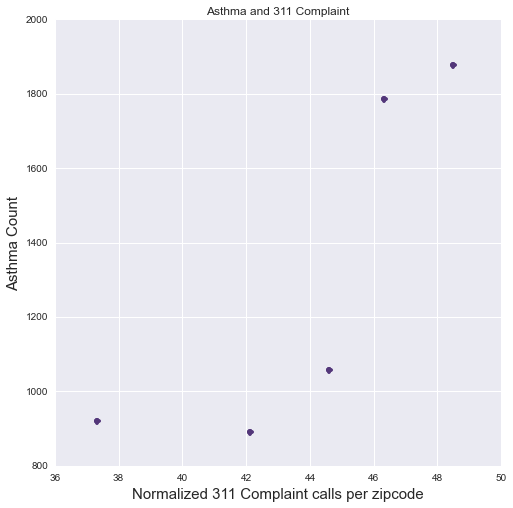

In [128]:
pl.figure(figsize = (8,8))
pl.plot(data['ratio'],df['asthma_count'],'o',color = '#53377A')
pl.xlabel('Normalized 311 Complaint calls per zipcode', fontsize = 15)
pl.ylabel('Asthma Count', fontsize = 15)
pl.title('Asthma and 311 Complaint')


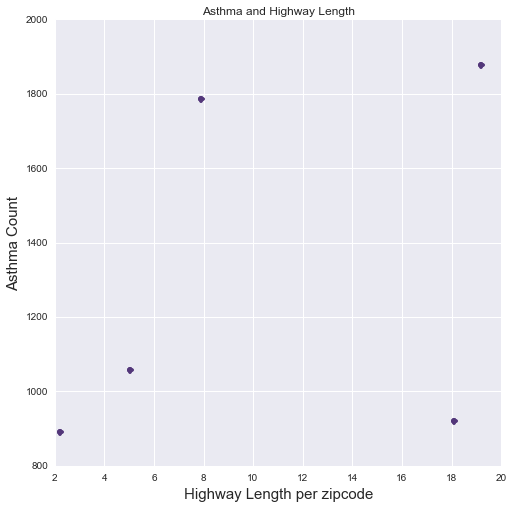

In [129]:
pl.figure(figsize = (8,8))
pl.plot(data['highway_length_y'],df['asthma_count'],'o',color = '#53377A')
pl.xlabel('Highway Length per zipcode', fontsize = 15)
pl.ylabel('Asthma Count', fontsize = 15)
pl.title('Asthma and Highway Length')


In [127]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
X = data[['highway_length_y','ratio']]
y = data['asthma_count']
X = sm.add_constant(X)
fit1 = sm.OLS(y, X).fit()
print fit1.summary()

                            OLS Regression Results                            
Dep. Variable:           asthma_count   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     5.755
Date:                Tue, 22 Dec 2015   Prob (F-statistic):              0.148
Time:                        13:40:54   Log-Likelihood:                -32.684
No. Observations:                   5   AIC:                             71.37
Df Residuals:                       2   BIC:                             70.20
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
const            -3146.0591   1372.621  

/Users/XS/anaconda/lib/python2.7/site-packages/statsmodels/stats/stattools.py:72: UserWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n))


interpreting the model: it is a good model. R-squared is 0.852, which is rather high. Highway length and 311 complaint are not good predictors because their p-values are greater than 0.05 based on the regression results.  However, the sample size is too small and we need further information to justify the relationship between asthma and highway length, 311 complaint. Also, we can introduce more variables into the model such as murder rate and accessnto green space. 

Task 7 clustering

In [180]:
from sklearn.cluster import KMeans
import sklearn.cluster
from sklearn import mixture
from PIL import Image
from scipy.misc import imread
from scipy.cluster.vq import kmeans2
from scipy.cluster.vq import whiten


In [176]:
zipcodes_ratio = zipcodes_ratio[['geometry','highway_length','zipcode','ratio']]
zipcodes_ratio

,geometry,highway_length,zipcode,ratio
10001,"(POLYGON ((-73.999352 40.74733, -74.000399 40....",4.853261,10001,20.279023
10002,"(POLYGON ((-73.97702 40.711649, -73.977141 40....",5.163702,10002,23.823178
10003,"(POLYGON ((-73.981562 40.732643, -73.982022 40...",0.000000,10003,23.781747
10004,"(POLYGON ((-74.02213 40.684541, -74.022385 40....",8.692550,10004,13.048934
10005,"(POLYGON ((-74.008269 40.707722, -74.008645 40...",4.475026,10005,6.822107
10006,"(POLYGON ((-74.01101199999999 40.708594, -74.0...",2.850297,10006,11.300640
10007,"(POLYGON ((-74.002709 40.712597, -74.003163 40...",1.725329,10007,11.418440
10009,"(POLYGON ((-73.97616499999999 40.733385, -73.9...",3.139758,10009,34.301942
10010,"(POLYGON ((-73.975391 40.73306, -73.9761649999...",4.612960,10010,25.031766
10011,"(POLYGON ((-74.000399 40.747767, -73.999352 40...",2.346345,10011,26.928124


In [177]:
zipcodes_ratio['highway'] =(zipcodes_ratio['highway_length'])*25.6346
zipcodes_ratio['calls_ratio'] = (zipcodes_ratio['ratio'])*95.5836
zipcodes_ratio

/Users/XS/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,geometry,highway_length,zipcode,ratio,highway,calls_ratio
10001,"(POLYGON ((-73.999352 40.74733, -74.000399 40....",4.853261,10001,20.279023,124.411402,1938.342063
10002,"(POLYGON ((-73.97702 40.711649, -73.977141 40....",5.163702,10002,23.823178,132.369444,2277.105118
10003,"(POLYGON ((-73.981562 40.732643, -73.982022 40...",0.000000,10003,23.781747,0.000000,2273.145038
10004,"(POLYGON ((-74.02213 40.684541, -74.022385 40....",8.692550,10004,13.048934,222.830045,1247.264040
10005,"(POLYGON ((-74.008269 40.707722, -74.008645 40...",4.475026,10005,6.822107,114.715498,652.081554
10006,"(POLYGON ((-74.01101199999999 40.708594, -74.0...",2.850297,10006,11.300640,73.066220,1080.155821
10007,"(POLYGON ((-74.002709 40.712597, -74.003163 40...",1.725329,10007,11.418440,44.228121,1091.415574
10009,"(POLYGON ((-73.97616499999999 40.733385, -73.9...",3.139758,10009,34.301942,80.486444,3278.703067
10010,"(POLYGON ((-73.975391 40.73306, -73.9761649999...",4.612960,10010,25.031766,118.251388,2392.626328
10011,"(POLYGON ((-74.000399 40.747767, -73.999352 40...",2.346345,10011,26.928124,60.147619,2573.886998


In [229]:
coordinates = zipcodes_ratio.as_matrix(columns=['highway', 'calls_ratio'])


In [230]:
whitened = whiten(coordinates)

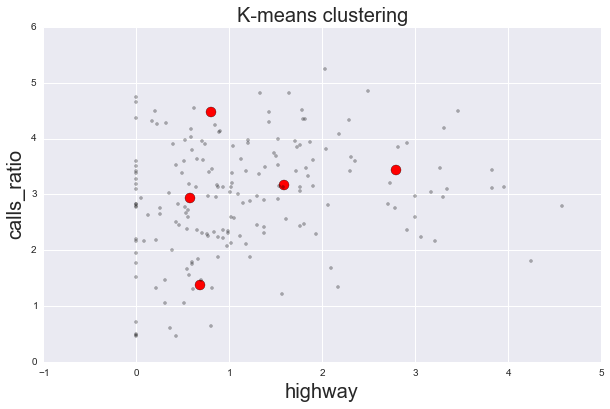

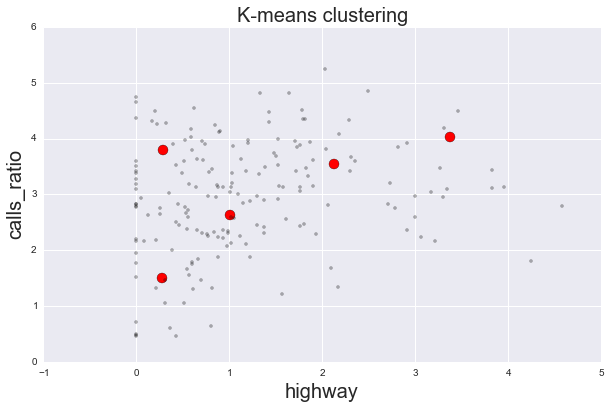

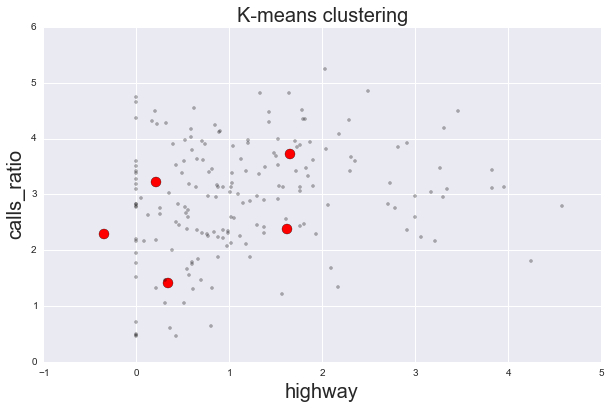

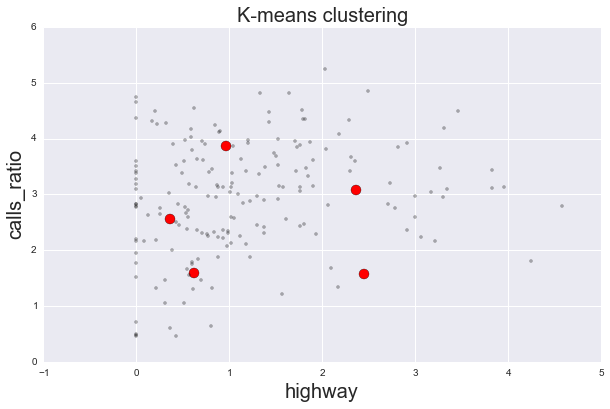

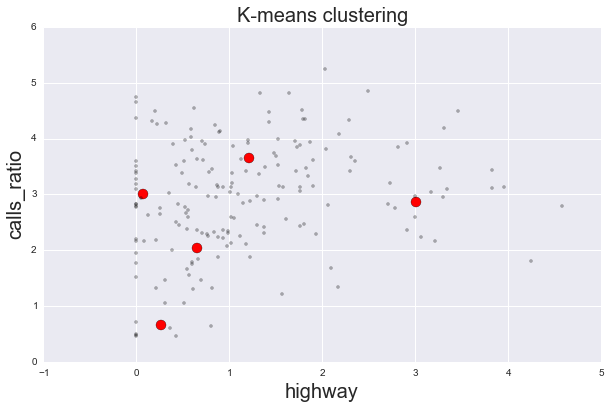

In [231]:
nk= 5
for i in range(5):
    cluster_centroids, closest_centroids = kmeans2(whitened, nk, iter=1)
    pl.figure(figsize=(10, 6))
    pl.scatter(cluster_centroids[:,0], cluster_centroids[:,1], c='r', s=100)
    pl.scatter(whitened[:,0], whitened[:,1], c='k', alpha=.3, s=10)
    pl.xlabel("highway", fontsize=20)
    pl.ylabel("calls_ratio", fontsize=20)
    pl.title("K-means clustering", fontsize=20)

In [271]:
nk1 = kmeans2(whitened, nk , iter=1)

In [233]:
nk1[1]

array([4, 4, 0, 4, 4, 0, 0, 1, 4, 4, 0, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 2,
       1, 1, 1, 2, 1, 2, 3, 3, 2, 3, 4, 2, 4, 2, 3, 4, 0, 0, 0, 0, 1, 0, 4,
       0, 4, 4, 3, 4, 4, 1, 0, 0, 4, 1, 4, 3, 2, 3, 3, 2, 2, 1, 2, 2, 2, 3,
       3, 3, 3, 4, 3, 3, 3, 3, 3, 2, 3, 3, 3, 4, 3, 4, 0, 3, 4, 4, 2, 4, 1,
       4, 1, 1, 4, 1, 4, 3, 3, 1, 4, 2, 1, 4, 4, 1, 0, 4, 1, 4, 1, 4, 4, 2,
       1, 2, 4, 1, 2, 4, 4, 1, 4, 3, 2, 1, 1, 1, 4, 3, 4, 4, 4, 4, 3, 3, 4,
       3, 4, 0, 3, 3, 3, 4, 4, 2, 2, 2, 3, 3, 4, 1, 4, 2, 1, 3, 3, 4, 1, 4,
       4, 4, 3, 4, 3, 2, 3, 3, 2, 2, 3, 3, 1, 3, 3, 3, 2, 1, 2, 2, 1], dtype=int32)

In [234]:
clustering_df = pd.DataFrame (nk1[1])
clustering_df = cluster_df.rename( columns = {0 : 'cluster'})


In [235]:
weight_df = pd.DataFrame(whitened)
weight_df.rename( columns = {1 : 'weighted_calls' , 0:'weighted_highway'})


,weighted_highway,weighted_calls
0,0.876206,1.881912
1,0.932253,2.210813
2,0.000000,2.206968
3,1.569351,1.210953
4,0.807920,0.633098
5,0.514592,1.048710
6,0.311490,1.059642
7,0.566851,3.183252
8,0.832823,2.322971
9,0.423608,2.498955


In [250]:
clust = weight_df.join(clustering_df)
clust

,0,1,cluster
0,0.876206,1.881912,4
1,0.932253,2.210813,4
2,0.000000,2.206968,4
3,1.569351,1.210953,0
4,0.807920,0.633098,0
5,0.514592,1.048710,0
6,0.311490,1.059642,0
7,0.566851,3.183252,2
8,0.832823,2.322971,4
9,0.423608,2.498955,4


In [238]:
type(clust)

pandas.core.frame.DataFrame

In [260]:
len(zipcodes_ratio)
zipcodes_ratio.index = range(len(zipcodes_ratio))
zipcodes_ratio

,geometry,highway_length,zipcode,ratio,highway,calls_ratio
0,"(POLYGON ((-73.999352 40.74733, -74.000399 40....",4.853261,10001,20.279023,124.411402,1938.342063
1,"(POLYGON ((-73.97702 40.711649, -73.977141 40....",5.163702,10002,23.823178,132.369444,2277.105118
2,"(POLYGON ((-73.981562 40.732643, -73.982022 40...",0.000000,10003,23.781747,0.000000,2273.145038
3,"(POLYGON ((-74.02213 40.684541, -74.022385 40....",8.692550,10004,13.048934,222.830045,1247.264040
4,"(POLYGON ((-74.008269 40.707722, -74.008645 40...",4.475026,10005,6.822107,114.715498,652.081554
5,"(POLYGON ((-74.01101199999999 40.708594, -74.0...",2.850297,10006,11.300640,73.066220,1080.155821
6,"(POLYGON ((-74.002709 40.712597, -74.003163 40...",1.725329,10007,11.418440,44.228121,1091.415574
7,"(POLYGON ((-73.97616499999999 40.733385, -73.9...",3.139758,10009,34.301942,80.486444,3278.703067
8,"(POLYGON ((-73.975391 40.73306, -73.9761649999...",4.612960,10010,25.031766,118.251388,2392.626328
9,"(POLYGON ((-74.000399 40.747767, -73.999352 40...",2.346345,10011,26.928124,60.147619,2573.886998


In [272]:
clustering_mapping = gpd.GeoDataFrame(pd.DataFrame({'geometry':zipcodes_ratio['geometry'],'cluster':nk1[1]}))
clustering_mapping

,cluster,geometry
0,4,"(POLYGON ((-73.999352 40.74733, -74.000399 40...."
1,4,"(POLYGON ((-73.97702 40.711649, -73.977141 40...."
2,4,"(POLYGON ((-73.981562 40.732643, -73.982022 40..."
3,4,"(POLYGON ((-74.02213 40.684541, -74.022385 40...."
4,4,"(POLYGON ((-74.008269 40.707722, -74.008645 40..."
5,4,"(POLYGON ((-74.01101199999999 40.708594, -74.0..."
6,4,"(POLYGON ((-74.002709 40.712597, -74.003163 40..."
7,3,"(POLYGON ((-73.97616499999999 40.733385, -73.9..."
8,4,"(POLYGON ((-73.975391 40.73306, -73.9761649999..."
9,4,"(POLYGON ((-74.000399 40.747767, -73.999352 40..."


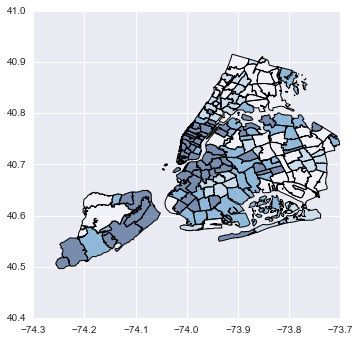

In [274]:
#f, ax = plt.subplots(1 ,figsize=(10,10))
clustering_mapping.plot(column='cluster', colormap='Blues', scheme='QUANTILES', k=5)


Based on the clustering results, it seems that lower manhattan and downtown brooklyn have similar asthma risk. 